# Notebook di training

In [1]:
!pip install pandas
!pip install sklearn
!pip install matplotlib

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [3]:
path_train = './train.csv'
path_test = './test.csv'

train_data = pd.read_csv(path_train)
train_data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4553-DVPZG,Female,0,Yes,No,62,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,6164.7
1,No,0373-AIVNJ,Male,0,No,No,9,No,No phone service,DSL,...,Yes,Yes,No,No,No,One year,No,Mailed check,39.55,373
2,No,3324-OIRTO,Male,0,Yes,Yes,71,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.65,7288.4
3,Yes,5889-LFOLL,Female,0,No,No,13,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,1115.2
4,No,2277-BKJKN,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.20,7213.75


Definiamo una funzione **prepare_data** che pulisce il dataset:
- elimina la colonna customerID, che non può avere una correlazione con la'abbandono o meno dell'utente)
- converte i tipi di alcune colonne da stringa a numerico
- elimina le righe che contengono valori nulli (dovrebbero essere solo 10 in TUTTO il dataset originale pertanto è una semplificazione che ci possiamo permettere)
- fitta i valori categorici (stringhe anch'essi) in valori numerici per poter fare il training

In [4]:
non_categorical = ["customerID", "SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
numerical = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
categorical = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']

enc = OrdinalEncoder()
enc.fit(train_data[categorical])

#riceve in input un dataframe e restitusce un dataframe "preparato" per fare training o test
def prepare_data(data):
    data = data.drop(columns=["customerID"])
    data[numerical] = data[numerical].apply(pd.to_numeric, errors="coerce", downcast="float")
    data = data.dropna()
    data[categorical] = enc.transform(data[categorical])
    return data

In [5]:
new_train_data = prepare_data(train_data)
new_train_data

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,1.0,0.0,62.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,101.349998,6164.700195
1,0.0,1.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,39.549999,373.000000
2,0.0,1.0,0.0,1.0,1.0,71.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,104.650002,7288.399902
3,1.0,0.0,0.0,0.0,0.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,84.599998,1115.199951
4,0.0,0.0,1.0,1.0,0.0,71.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,99.199997,7213.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,0.0,1.0,0.0,1.0,0.0,70.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,3.0,79.150002,5536.500000
4784,0.0,0.0,0.0,0.0,0.0,70.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,90.250000,6385.950195
4785,0.0,0.0,0.0,0.0,0.0,66.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,88.900002,6000.100098
4786,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,20.100000,39.799999


## Split training-validation

Ora splittiamo il dataset per il training, una parte la useremo per addestrare il modello e la restante come validation set. Come spiegato anche nell'altro notebook, la ragione scelta per lo split totale è 70-15-15. Il 15% dei dati per il test set già si trova nel file apposito. Il file per il training contiene l'85% dei dati, quindi per mantenere la proporzione dovremo dividere questo set con ragione 82-18.

In [6]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
target = ['Churn']

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(new_train_data[features], new_train_data[target], random_state=10, test_size=0.18)

## Decision Tree di prova

Usiamo un Decision Tree veloce, senza modificare parametri per vedere com'è la situazione in modo generale

score: 0.7200929152148664


<BarContainer object of 19 artists>

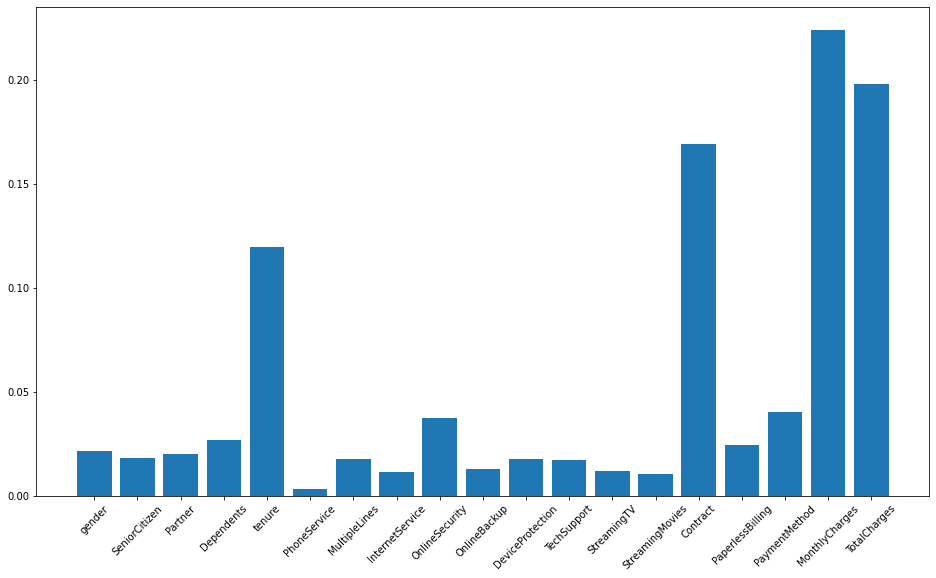

In [8]:
tree = DecisionTreeClassifier(criterion="entropy", random_state = 10)
tree.fit(X_train, y_train)
print("score:", tree.score(X_valid, y_valid))
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
plt.bar(features, tree.feature_importances_)

Delle 19 features che abbiamo, solo 4 hanno un'importanza rilevante, e sono:
- tenure
- Contract
- MonthlyCharges
- TotalCharges

Ci si poteva aspettare il basso valore descrittivo di features come *gender*, il sesso di un utente non ne influisce il gradimento o meno del servizio!
Anche *PhoneService* è plausibile che influisca poco poiché ormai un operatore si sceglie per i servizi internet piuttosto che per le chiamate.  
Interessante che *OnlineSecurity* sia di spicco, tra le features comunque non rilevanti. Potrebbe voler dire che la sicurezza online è un criterio ricercato

Best depth: 6


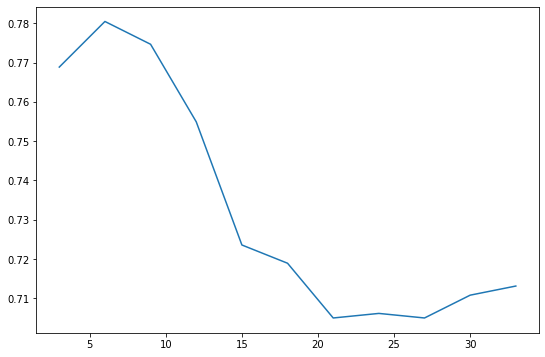

In [9]:
good_features = ["tenure", "Contract", "MonthlyCharges", "TotalCharges"]

X_train, X_valid, y_train, y_valid = train_test_split(new_train_data[good_features], new_train_data[target], random_state=10, test_size=0.18)

depths = [i for i in range(3,34,3)]
scores = []

for depth in depths:
    tree = DecisionTreeClassifier(criterion="entropy", random_state = 10, max_depth= depth)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_valid, y_valid))

plt.figure(figsize=(9,6))
plt.plot(depths, scores)

idx_max = scores.index(max(scores))
print("Best depth:", depths[idx_max])

Visto che la profondità 6 ha risultati migliori vediamo nel range di profondità da 2 a 10

Best depth: 5


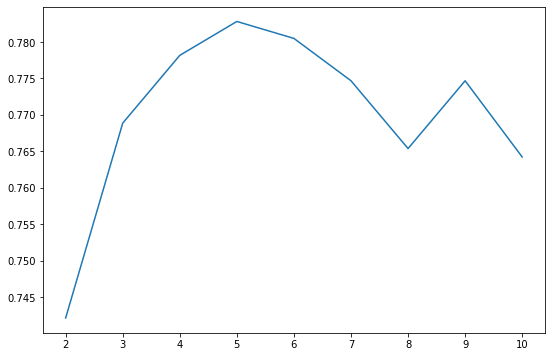

In [10]:
depths = [i for i in range(2,11)]
scores = []

for depth in depths:
    tree = DecisionTreeClassifier(criterion="entropy", random_state = 10, max_depth= depth)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_valid, y_valid))

plt.figure(figsize=(9,6))
plt.plot(depths, scores)

idx_max = scores.index(max(scores))
print("Best depth:", depths[idx_max])

La miglior profondità è quindi 5, possiamo ora fare il train completo e il test finale

In [11]:
test_data = prepare_data(pd.read_csv(path_test))
X_train, y_train = new_train_data[good_features], new_train_data[target]
X_test, y_test = test_data[good_features], test_data[target]

tree = DecisionTreeClassifier(criterion="entropy", random_state = 10, max_depth=5)
tree.fit(X_train, y_train)
print("score:", tree.score(X_test, y_test))

score: 0.7734282325029656
